# Shivesh Upadhyay

# Looking at Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('SampleSuperstore.csv')
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
dataset.shape

(9994, 13)

##### We now need to look which column  has how many unique value, so that we can see that which column can be looked first to analysis if we can increase the profit. We also look at null values(missing data) if any. 

In [4]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [5]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### Now looking at above result we can see that the columns which can be a parameter to identify the profit issues are 'Ship Mode' , 'Segment' , 'city' , 'state', 'region' , 'category' 'sub-category'  and 'discount'.  Out of this some are large in number and some are very less in number, some can directly affect profit and some have indirect affect.   We can see that 'Sub-Category' is best place to start because of following reason. Firstly it directly affect profit because customer buy the product according to their need i.e. 'Sub-Category' and also this has neither too big nor too large number of unique value.

In [6]:
dataset["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [7]:
x1 = ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']
for i in x1:
    d5 = dataset[dataset["Sub-Category"] == i]
    print(i + "=", end =" ")
    print(d5["Profit"].sum())

Bookcases= -3472.5559999999996
Chairs= 26590.1663
Labels= 5546.254
Tables= -17725.481099999997
Storage= 21278.8264
Furnishings= 13059.1436
Art= 6527.787
Phones= 44515.730599999995
Binders= 30221.763299999995
Appliances= 18138.005400000002
Paper= 34053.5693
Accessories= 41936.6357
Envelopes= 6964.1767
Fasteners= 949.5182
Supplies= -1189.0994999999998
Machines= 3384.7569000000008
Copiers= 55617.82490000001


#### So here we see  three Sub-Categories ('Bookcases', 'Tables' , 'Supplies') are giving loss. Now we know loss area so we can plot profit to get  idea of reason for loss

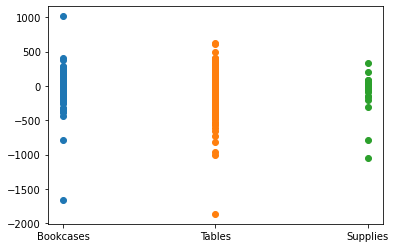

In [8]:
x2 = ['Bookcases', 'Tables' , 'Supplies']
for i in x2:
    d = dataset[dataset["Sub-Category"] == i]
    plt.scatter(d["Sub-Category"],d["Profit"])

#### From above plot we can't find any reason so need deeper  analysis of the dataset for these sub categories. So we as follows

In [9]:
d1 = dataset[dataset["Sub-Category"].isin(x2)]

In [10]:
d1.shape

(737, 13)

In [11]:
d1.nunique()

Ship Mode         4
Segment           3
Country           1
City            224
State            43
Postal Code     279
Region            4
Category          2
Sub-Category      3
Sales           630
Quantity         12
Discount          9
Profit          661
dtype: int64

#### Now for this data we look  effect of other columns by ploting it vs profit

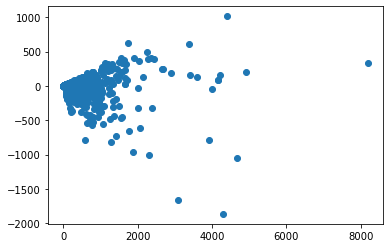

In [12]:
plt.scatter(d1["Sales"],d1["Profit"])

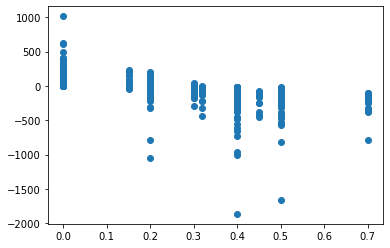

In [13]:
plt.scatter(d1["Discount"],d1["Profit"])

### From above plot we see that giving discount on these sub- category tends to lower the profit in negative area. So if for these sub- categories if company stops giving discount then loss will changed to profit. This is shown numerically below

In [14]:
d2 = d1[d1['Discount'] == 0.0]
d2['Profit'].sum()

21070.4056

In [15]:
for i in x2:
    d = d2[d2["Sub-Category"] == i]
    print(d['Profit'].sum())

6075.7117
13276.2997
1718.3942000000002


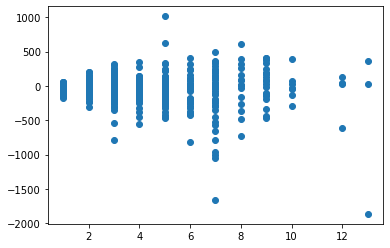

In [16]:
plt.scatter(d1["Quantity"],d1["Profit"])

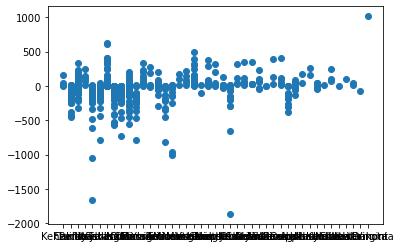

In [17]:
plt.scatter(d1["State"],d1["Profit"])

#### From above plot we see that many of states are giving loss and many are giving profit. But the ratio being around 50-50 , we can draw any practically implementable conclusion and solution from this

### Although we can reach out this problem in other ways also and get other ways of increasing profit also but I stop here getting one solution only

286397.0217 329854.5639


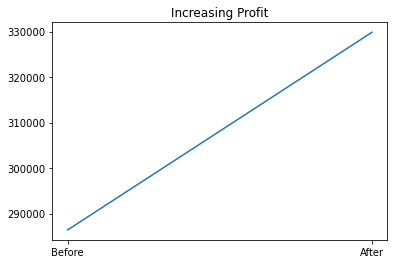

In [38]:
x = dataset['Profit'].sum()
y = dataset[~(dataset['Sub-Category'].isin(x2) & dataset['Discount'] != 0.0)]['Profit'].sum()
print(x, y)
plt.plot(['Before', 'After'], [x,y])
plt.title('Increasing Profit')
plt.show()